In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [30]:
# Load your gold price CSV file
data = pd.read_csv('/content/gold (1).csv', parse_dates=True, index_col=0)

# Preview the data to understand its structure
data.head()


,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


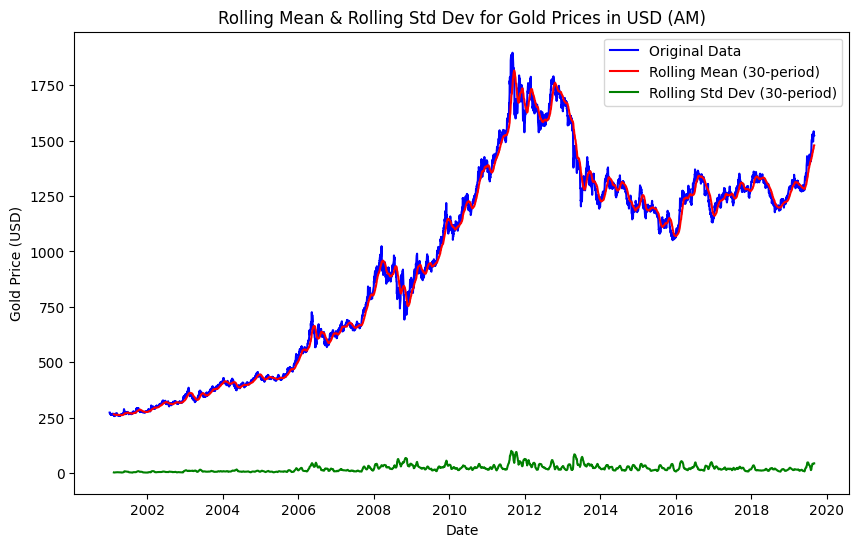

In [31]:
# Calculate the rolling mean and rolling standard deviation for 30 periods
rolling_mean = data['USD (AM)'].rolling(window=30).mean()
rolling_std = data['USD (AM)'].rolling(window=30).std()

# Plotting the original data, rolling mean, and rolling standard deviation
plt.figure(figsize=(10,6))

# Plot original data
plt.plot(data['USD (AM)'], label='Original Data', color='blue')

# Plot rolling mean
plt.plot(rolling_mean, label='Rolling Mean (30-period)', color='red')

# Plot rolling standard deviation
plt.plot(rolling_std, label='Rolling Std Dev (30-period)', color='green')

# Adding labels and title
plt.title('Rolling Mean & Rolling Std Dev for Gold Prices in USD (AM)')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.legend(loc='best')

# Display the plot
plt.show()


In [32]:
# Perform Augmented Dickey-Fuller Test for stationarity on 'USD (AM)'
adf_result = adfuller(data['USD (AM)'].dropna())  # dropna() in case there are missing values

# Display ADF Test result
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Interpretation of ADF Test
if adf_result[1] < 0.05:
    print("The time series is likely stationary (Reject null hypothesis).")
else:
    print("The time series is likely non-stationary (Fail to reject null hypothesis).")


ADF Statistic: -1.0653629752531542
p-value: 0.7286853153924067
The time series is likely non-stationary (Fail to reject null hypothesis).


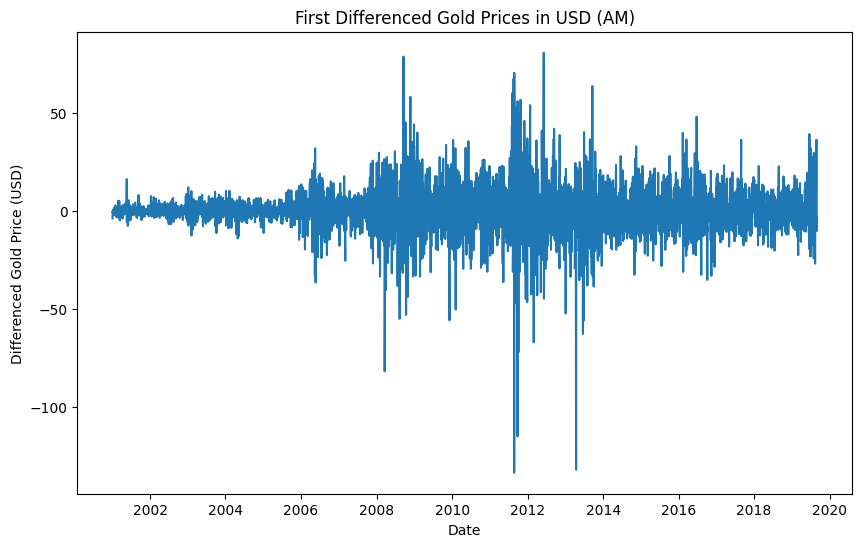

In [33]:
# First differencing
data['USD (AM)_diff'] = data['USD (AM)'].diff()

# Plotting the first differenced data
plt.figure(figsize=(10,6))
plt.plot(data['USD (AM)_diff'])
plt.title('First Differenced Gold Prices in USD (AM)')
plt.xlabel('Date')
plt.ylabel('Differenced Gold Price (USD)')
plt.show()


In [34]:
# Perform ADF Test on the differenced data
adf_result_diff = adfuller(data['USD (AM)_diff'].dropna())

# Display ADF Test result for differenced data
print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value (Differenced):", adf_result_diff[1])

# Interpretation of ADF Test after differencing
if adf_result_diff[1] < 0.05:
    print("The differenced time series is likely stationary (Reject null hypothesis).")
else:
    print("The differenced time series is likely non-stationary (Fail to reject null hypothesis).")


ADF Statistic (Differenced): -13.576424711442268
p-value (Differenced): 2.1651705729972953e-25
The differenced time series is likely stationary (Reject null hypothesis).
